# Chapter03 - Modern Neural Network
- Hyper 동아리에서 활용하는 자료입니다
- 작성자 : 소프트웨어융합학과 18학번 문희준
- 잘못된 내용이나 오타에 대한 feedback은 대환영입니다^^ 

## CNN
CNN은 초기 신경망의 단점을 해결하기 위해여 도입되었습니다<br>
기존의 **Fully-connected-layer 1) 매개변수의 폭발적인 증가 2) 공간 추론의 부족이라는 문제점이 있습니다.** <br>

### 매개변수의 폭발적인 증가
이미지는 엄청난 갯수의 숫자로 구성된 복합적인 구조라 할 수 있습니다(이미지의 높이 X 넓이 X 깊이 (= 채널수, RGB경우에는 3))<br>
앞서 예재로 사용하였던 28 X 28 이미지도 사실 28 X 28 X 1(Grayscale) = 784개의 값으로 이루어진 입력 벡터로 표현할 수 있습니다<br>
또한 네트워크가 깊어질수록 매개변수의 갯수는 매우 증가합니다<br>

### 공간 추론의 부족
기존의 Fully-connected-layer는 이전 계층의 모든 값을 받기 떄문에 모든 pixel이 **원래 위치와 상관없이 결합되므로, 픽셀 사이의 근접성 개념이 손실**됩니다<br>

## CNN의 도입
CNN은 **다차원의 데이터를 처리할 수 있습니다**<br>
뉴런이 이전 계층의 모든 요소와 연결된 Fully-connected-layer와 달리,<br>
**CNN은 이전 계층에서 일부 영역(receptive field라 부릅니다)에만 연결되었다는 특징이 있습니다** <br>
아래 그림에서 보다 명확하게 이해할 수 있을 것 같습니다

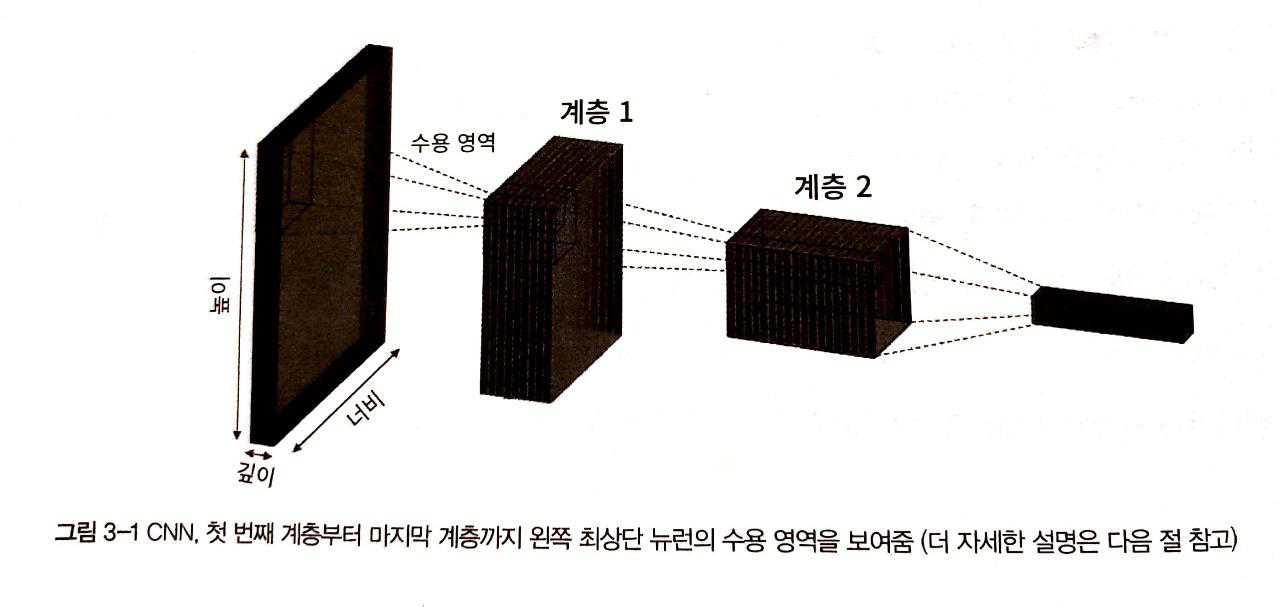

## Convolution과 Cross-relation
: 먼저 Convolution 연산과 Cross-relation 연산을 소개하겠습니다<br>
Convolution과 Cross-relation의 정의는 아래와 같습니다

 

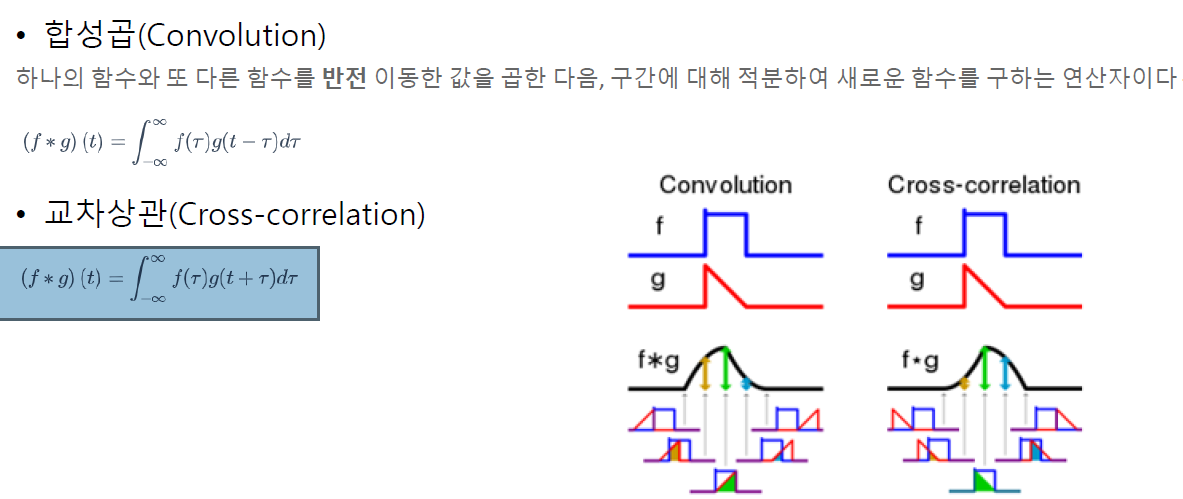

둘의 차이점은 연산 시, **filter(위의 그림에서는 함수 g)의 fliping 여부입니다**<br>
**여기서 우리가 주의해야 할 부분이 있습니다!<br>
머신러닝, 딥러닝에서는 실제로는 cross-relation연산을 실행하지만, convolution 연산이라고 보편적으로 부릅니다. 반드시 알아두세요!**<br><br>

그럼 영상은 2차원이니, 2차원 convolution 연산도 가능할까요?<br>
당연합니다. 2차원 convolution의 방법은 아래와 같이 filter(kernel)을 움직이면서 input과 kernel의 공통 부분의 원소들을 곱하여 sum을 구하는 것입니다. 아래 그림을 참고하면 더 이해가 쉬울 것 같네요!<br>

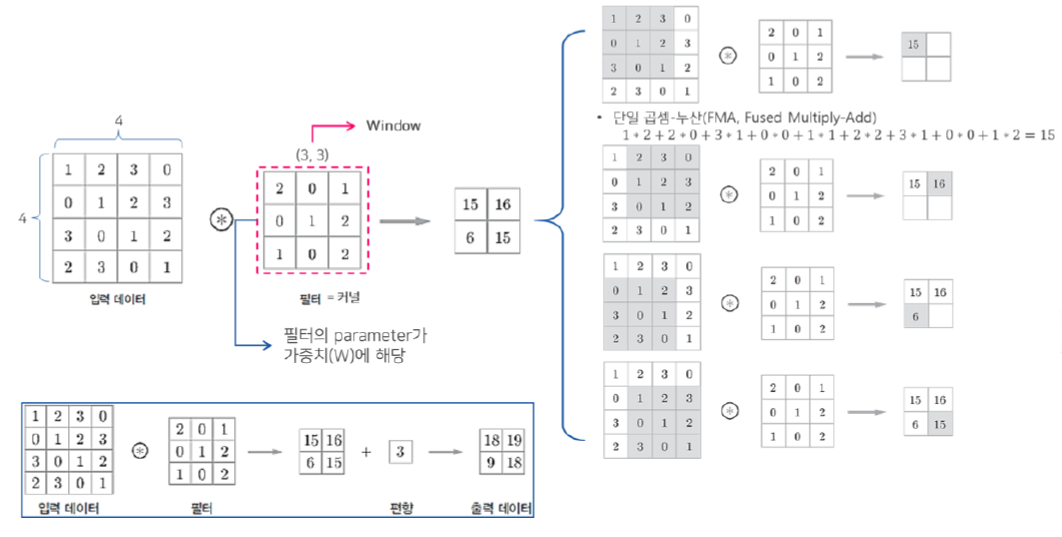

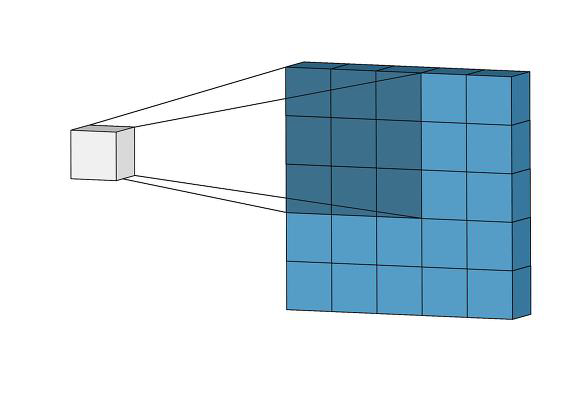


---

## CNN의 구성
CNN은 다음과 같이 구성됩니다<br>
- 입력 레이어 : 입력 image가 들어오는 layer
- Convolution layer : 입력 이미지의 receptive field에 대하여 convolution 연산을 수행
- Activation layer : Activation 함수를 통과시킵니다 (일반적으로 ReLU함수를 사용합니다)
- Pooling layer : Width와 Height에 대해 downsampling을 수행합니다
- FC layer : 네트워크의 마지막 부분에서 **class classfication**을 수행합니다<br>


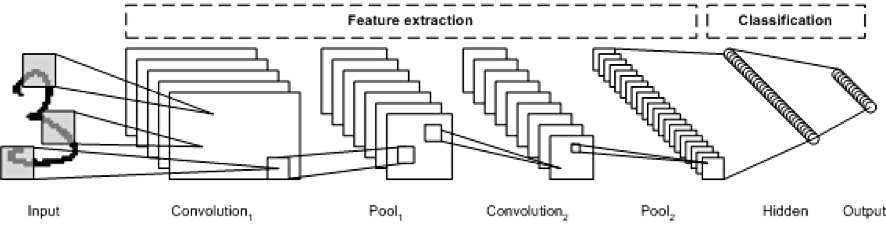



## 주요 개념 정리

---

### Channel(depth)
이미지 데이터는 주로 R,G,B 3개의 채널로 이루어졌습니다.<br>
Grayscale 이미지 역시 이 R,G,B 값을 이용하여 얻을 수 있으며, 흑백영상은 1채널을 가집니다.<br>

---

### Stride
Stride는 **Kernel(filter)가 움직이는 보폭이라고 생각하면 됩니다**<br>
stride = 1인 경우 Kernel은 1 pixel씩 움직일 것입니다<br>
stride 값에 따라, convolution 연산의 결과인 Feature map의 크기도 달라집니다<br>
아래 그림은 stride가 1인 경우와 2인 경우일 때입니다. 각각의 output은 4X4, 2X2인 것을 확인할 수 있습니다<br>


---





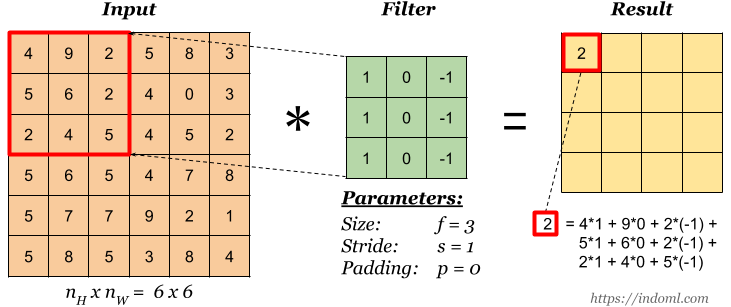
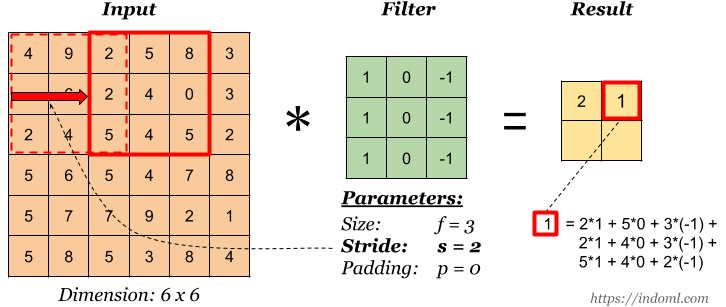



---
### Padding
CNN에서는 Kernel 연산과 stride의 영향으로 연산을 하면 할 수록 output의 크기는 작아질 것입니다<br>
이는 Feature의 손실로 이어질 수 있으므로, 부정적인 결과를 초래합니다<br>
**padding은 이를 방지하고자 특정값으로 input의 주변을 채워 넣는 것입니다.<br>
이를 통해서 input과 output의 크기가 같아집니다.<br>
보통 0을 이용하여 input 주변의 값을 채웁니다**

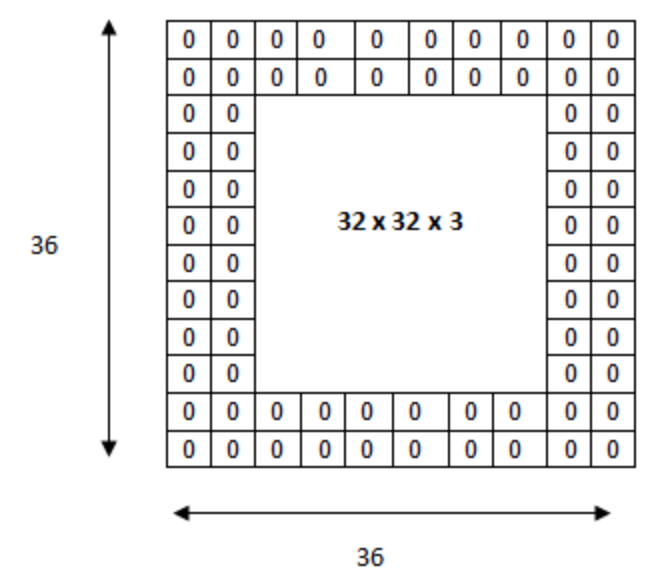


---

## Convolution layer

Convolution연산을 통해 결국에 우리는 2차원의 pixel data로부터 Feature(특징) map을 얻을 수 있습니다<br>
그럼 CNN은 이러한 Feature map을 이용하여 결국에 무엇을 학습할까요?<br>
**결론부터 말하자면, Kernel의 성분값을 학습하는 것이라고 할 수 있습니다**<br>
CNN은 kernel연산을 통해 특징을 추출하므로,<br>
결국에 우리가 어떤 것을 detect하기 위해서는 잘 detect 할 수 있는 Kernel(filter)를 알아야 하겠죠??<br>
**Convolution layer에서는 kernel과의 convolution 결과인 Feature map을 반환합니다.<br>
이때, 사용한 kernel의 갯수가 Feature map의 channel(depth)가 됩니다<br>
각 kernel에 대한 결과값(2D)가 kernel의 갯수만큼 있을테니 그렇겠죠?<br>**

convolution layer를 통과한 이후에는 Activation layer를 지나면서 activation function을 지난 값이 저장될 것입니다<br> 

---





In [ ]:
import tensorflow as tf

class SimpleConvolutionLayer(tf.keras.layers.Layer):

  def __init__(self, num_kernels = 32, kernel_size=(3,3), stride = 1):
    ''' 계층의 초기화
    num_kernels : kernel의 갯수
    kernel_size : kernel의 크기 (Heigth X Width)
    stride : 보폭
    '''
    super().__init__()
    self.num_kernels = num_kernels
    self.kernel_size = kernel_size
    self.stride = stride

  def build(self, input_shape):
    '''
    input_shape : 계층의 입력 형상(shape). 예를 들어 B X Height X Width X Channel
    '''
    # input_shape를 BHWC 포맷이라 가정합니다
    num_input_channel = input_shape[-1]
    kernel_shape = (*self.kernel.size, num_input_channel, self.num_kernels) # 실제 커널 1개의 shape는 (kernel.size X input shape)(3D)이며 이러한 커널이 num_kernels만큼 존재한다
    glorot_init = tf.initializers.GlorotUniform() # 필터값을 Glorot 분포를 따르는 값으로 초기화
    self.kernels = self.add_weight(name='kernels', shape=kernel_shape, initializer=glorot_init,trainable=True) # 변수를 계층에 추가하기 위한 method
    self.bias = self.add_weight(name='bias', shape=(self.num_kernels,), initializer='random_normal',trainable=True) # 편향값 변수에도 동일하게 적용

  def call(self, inputs):
    '''계층을 호출, 해당 계층의 연산을 입력 텐서에 적용'''
    return conv_layer(inputs, self.kernels, self.bias, self.stride)

위와 같이 직접 구현할 수도 있지만, Keras API를 이용하여 간단히 model을 instance화 시킬 수 있습니다<br>

In [ ]:
conv = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu')

## Pooling layer
**Pooling layer는 Convolution layer의 출력 데이터 (Activation Map or Feature Map)를 downsampling (크기를 줄이거나 특정 데이터를 강조)하는 역할을 합니다**<br>
Pooling의 방법으로는 **Max Pooling, Average Pooling, Min Pooling**을 주로 이용합니다.<br>
아래 그림처럼 Max pooling은 pool size에서 최댓값을 이용하여 downsampling 하고 있으며, Average Pooling은 평균값을 이용하여 downsampling하고 있습니다<br>

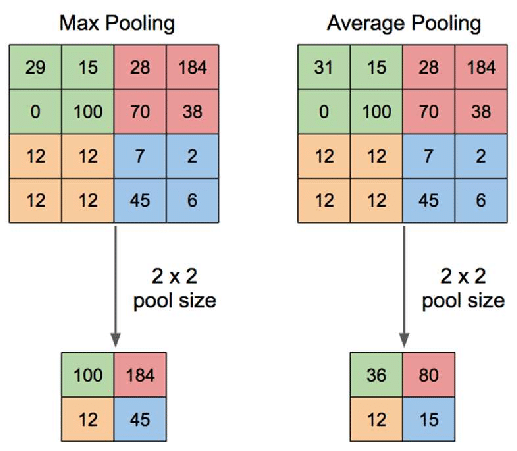

Keras API를 이용하여 인스턴스를 좀 더 간결하게 만들 수 있습니다<br>

In [ ]:
avg_pool = tf.keras.layers.AvgPool2D(pool_size=2, strides=2)
max_pool = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)



---
## FC layer(Dense layer)
**FC layer는 conv-pooling layer의 결과를 이용하여 class를 분류하는 역할을 합니다**<br>
먼저 **Flatten layer을 통하여 2D image를 1D vector로 만든다<br>
이후에 softmax layer를 이용하여 class를 분류한다**<br>

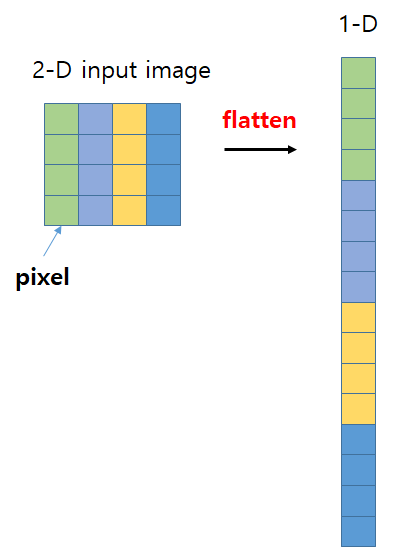



---

# LeNet-5
LeNet은 Yann Lecun이라는 사람이 제시한 초기의 CNN 모델입니다<br>
Input -> Conv1 -> Avg.pooling1 -> Conv2 -> Avg.pooling2 -> Conv3 -> FC1 -> FC2 순서로 모델이 구성됩니다<br>
Architecture detail은 아래와 같습니다.<br>

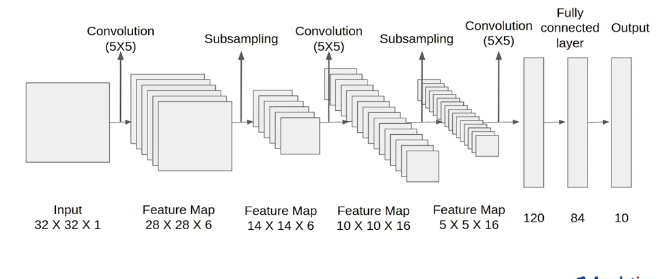
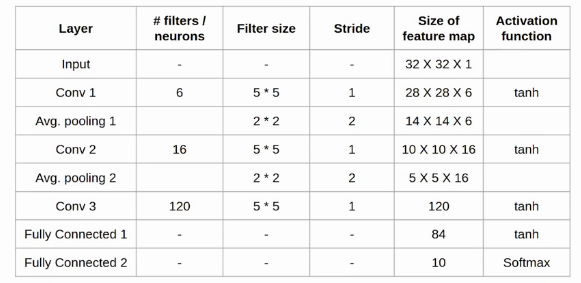

그럼 이제 keras를 이용하여 직접 LeNet-5를 구현해보겠습니다

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

img_height = 28
img_width = 28
img_channels = 1
input_shape = (img_height, img_width, img_channels)
num_classes = 10 # 0 ~ 9

model = Sequential()

# 1st Block(Conv2D + Avg_pooling)
model.add(Conv2D(6, kernel_size=(5,5), padding='same', 
                 activation='relu', 
                 input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Block(Conv2D + Avg_pooling)
model.add(Conv2D(6, kernel_size=(5,5), padding='same',
                 activation='relu',
                 input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

# FC layer
model.add(Flatten()) # 2D -> 1D vectors
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

이제 LeNet-5를 이용하여 MNIST 숫자 데이터를 분류해보겠습니다!

In [ ]:
# load data
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train, X_test = X_train.reshape(-1,*input_shape), X_test.reshape(-1, *input_shape)


# build model
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for monitoring
Callbacks = [
             # 3 epoch가 지나도 'val_loss'가 개선되지 않으면 훈련을 중단한다
             tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]

# Train
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test), callbacks=Callbacks)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 37s 4ms/step - loss: 0.6071 - accuracy: 0.7970 - val_loss: 0.1968 - val_accuracy: 0.9371
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1743 - accuracy: 0.9461 - val_loss: 0.1196 - val_accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1253 - accuracy: 0.9607 - val_loss: 0.1052 - val_accuracy: 0.9665
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0999 - accuracy: 0.9685 - val_loss: 0.0838 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0845 - accuracy: 0.9739 - val_loss: 0.0718 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9769 - val_loss: 0.0658 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - 

정확도가 chatper1, 2에서 구현했던 것보다 엄청 향상된 것을 볼 수 있습니다!<br>
자 이제 여러분이 구현할 차례입니다.<br>
**AlexNet를 여러분이 직접 구현해보고, 이를 MNIST 데이터에 batch_size = 32, epochs = 30 만큼 학습시켜보세요!**<br>
아래는 AlexNet의 architecture table입니다<br>

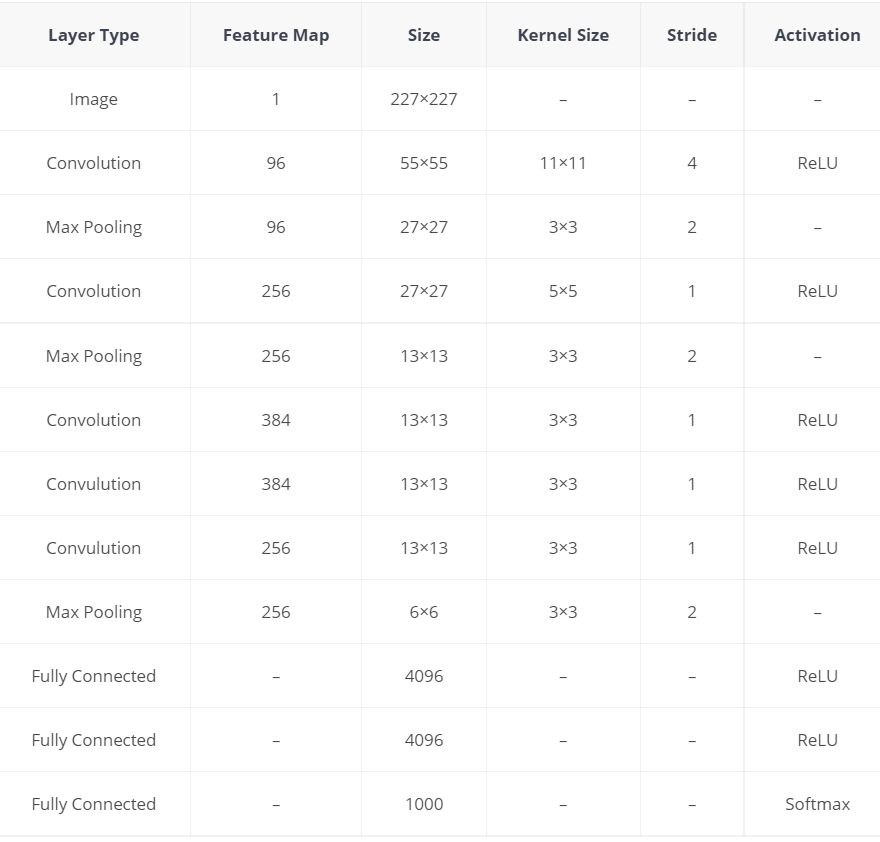

In [ ]:
# AlexNet -> Do yourself!
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import os
import time
#Load datasets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

#Preprocessing
plt.figure(figsize=(20, 20))
for i, (image, label) in enumerate(train_ds.take(5)):
  ax = plt.subplot(5, 5, i+1)
  plt.imshow(image)
  plt.title(CLASS_NAMES[label.numpy()[0]])
  plt.axis('off')

def process_images(image, label):
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image, (227, 227))
  return image, label

#Data/Input pipeline
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size = train_ds_size)
                  .batch(batch_size = 32, drop_remainder = True))

test_ds = (test_ds
                .map(process_images)
                .shuffle(buffer_size = train_ds_size)
                .batch(batch_size = 32, drop_remainder = True))

validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size = train_ds_size)
                  .batch(batch_size = 32, drop_remainder = True))
#Model implementation
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.summary()

root_logdir = os.path.join(os.curdir, "logs\\fit\\")

def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.fit(train_ds, epochs=30, validation_data=validation_ds, validation_freq=1, callbacks=[tensorboard_cb])

## 훈련 프로세스 개선

### optimizer
**Gradient Descent**<br>
GD방법은 앞서 설명하였듯이, 훈련하는 동안 손실 L을 최소화하기 위하여 Gradient값을 backpropagation하여 반복적으로 업데이트 하는 방법입니다. 

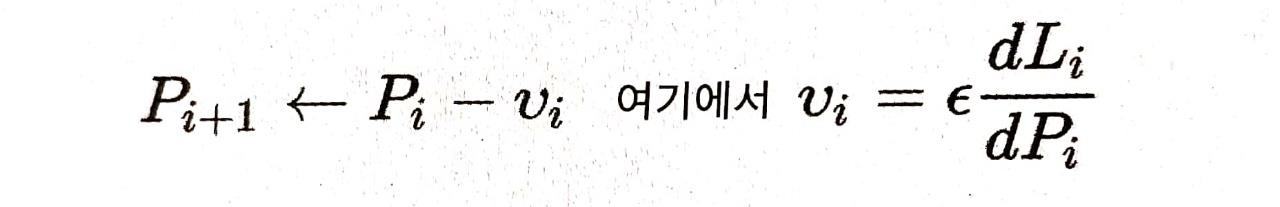

이 때, learning rate 값을 적절히 설정해 주어야 학습이 잘 될 것입니다. <br>
아래에는 이러한 Gradient Descent 방법의 까다로운 점을 소개하겠습니다<br>

---


### 1) 훈련 속도와 trade-off
만약에 학습률이 너무 높으면 신경망이 빠르게 학습하겠지만, **적절한 최소
Loss값을 찾지 못할 수 있습니다**<br>
아래 그림의 (B)를 보면은 update가 좌우로 왔다갔다 하면서 결국 최솟값에는 도달하지 못하고 있습니다<br>


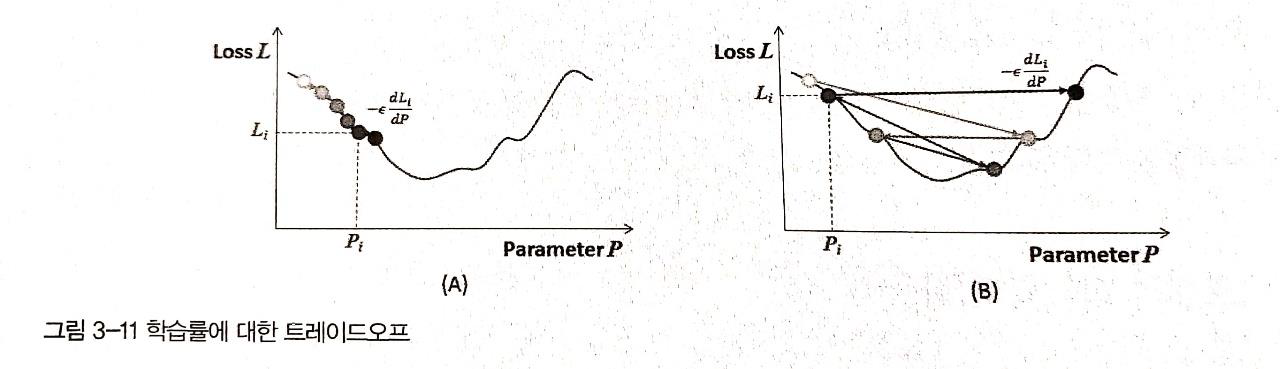

반면에 학습률을 과도하게 낮게 잡으면 수렴하는데 시간이 오래걸린다는 단점이 존재합니다<br>
적절한 학습률을 구하기 위해서 시행착오를 거쳐서 구하는 방법도 있겠지만, 잘 알려진 방법으로는 **학습률 감소(learning rate decay)**가 있습니다. 이 방법은 **epoch가 넘어갈때마다 학습률을 감소시켜서, 처음에는 빨리 학습하지만 점점 속도가 느려지면서, 최솟값을 지나가는 것을 방지하는 효과가 있습니다**<br>


---

### 2) 준최적 극솟값(Suboptimal local minimum)

이 역시 앞서서 설명드린 개념입니다<br>
**non-convex한 loss-function을 이용하면 local minimun에 빠지게 되어 global minimum에 도달하지 못한다는 문제가 발생합니다**<br>


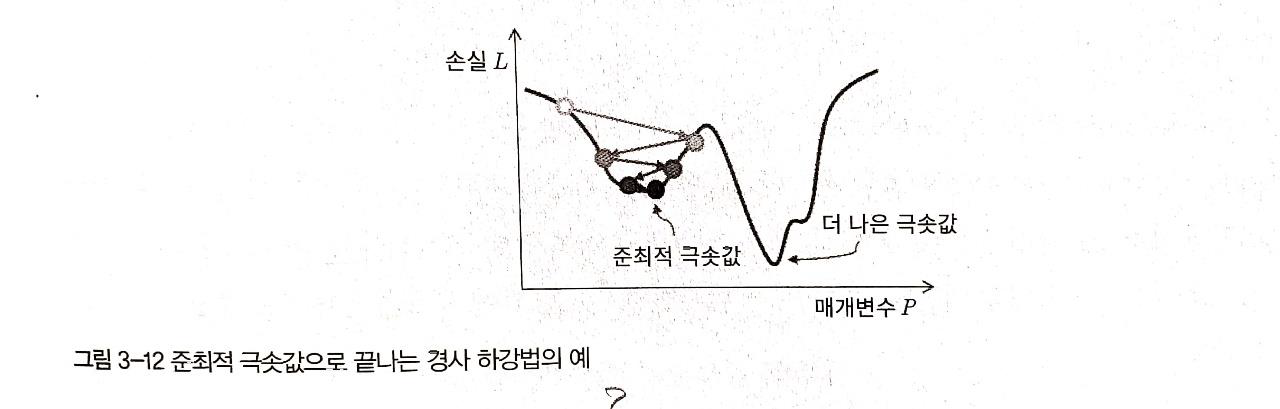



---

### 3) 동일한 learning-rate의 적용
전통적인 Gradient Descent 방법에서는 동일한 학습률이 네트워크의 모든 매개변수를 업데이트 하는데 사용됩니다.<br>
 이러한 방법은 **모든 변수가 동일한 민감도를 갖지 않는다는 문제점이 있습니다.**<br>
 오히려 결정적인 매개변수를 좀 더 신중하게 update하고, 기여도가 떨어지는 매개변수들은 과감하게 update하는 것이 이로울 수 있습니다<br> 




---

## 고급 최적화 기법
 

지금부터는 단순한 Gradient Descent 방법을 뛰어넘는, SGD 방법 기반의 고급 최적화 알고리즘들을 소개하겠습니다<br>

---


### Momentum
Momentum(관성)이란 물리학에서 운동상태를 계속 유지하려고자 하는 성질을 뜻합니다<br>
모멘텀 알고리즘에서는 새로운 변수인 v를 도입하여 update하는데 적용합니다.<br>
v는 방향과 속도를 갖는다고 생각하면 됩니다.<br>
아래 공식에서 보듯이 v는 previous한 v값을 고려하면서, 현재의 gradient 값도 동시에 고려하고 있습니다.<br>
만약에 이전의 v와 현재의 단계가 같은 방향을 나타내면 모멘텀을 더해서 SGD를 그 방향으로 가속화 시킵니다.<br>
반대로 방향이 다르다면 모멘텀은 이전의 v에 방향에 현재의 graident방향을 더한 방향이 됩니다|.<br>

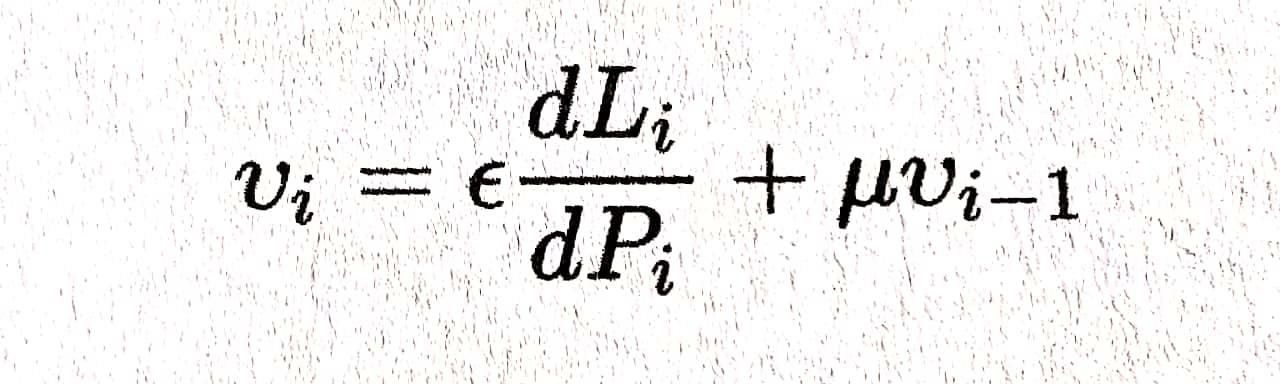

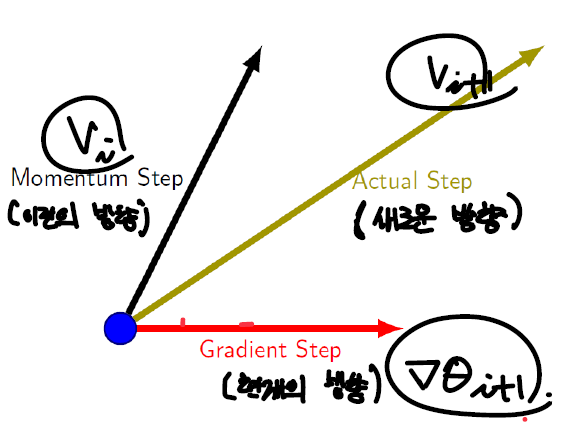

Keras에서 모멘텀 알고리즘은 optimizer에서 사용할 수 있습니다

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.0, nesterov=False) 

NameError: ignored



---

### Nesterov Momentum
Nesterov 모멘텀은 기존의 모멘텀 방식을 바탕으로 합니다.<br>
기존의 방법과의 차이점으로는<br>
1)**먼저 기존의 v벡터 만큼 먼저 이동한 후<br>
2)이동한 곳에서 gradient 벡터값을 계산하고 그만큼 다시 이동합니다<br>
즉 기존의 방법은 현재 지점에서 기존의 v벡터와 gradient벡터의 합을 구해서 그 합벡터만큼 이동하는 반면에,<br>
Nesterov는 먼저 v만큼 이동하고 거기서 grdient벡터를 구해 다시 이동하는 것입니다<br>

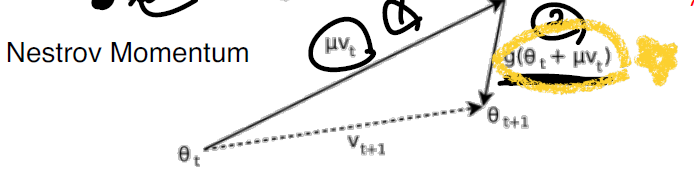

Nesterov 방법은 아래와 같이 사용할 수 있습니다

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.0, nesterov=True) 



---

### AdaGrad
**AdaGrad 방법은 SGD에서 update를 할 크기(step size)를 정하는 방법입니다**<br>
Variable들을 업데이트 할 때, 이전에 많이 움직이지 않았던 변수들을 **large step size**를 가지는 반면,<br>
이전에 많이 움직였던 변수들은 **small step size**를 가지게 합니다.<br>
이 방법은 이전에 움직였던 방향으로는 적게, 안움직인 방향으로는 많이 움직이는 방법이 핵심입니다.<br>
Accumulated gradient를 통해 기존까지 움직인 방향을 알 수 있으며, 아래 공식처럼 **그것과 역수인 방향으로 update가 일어납니다**<br>
  

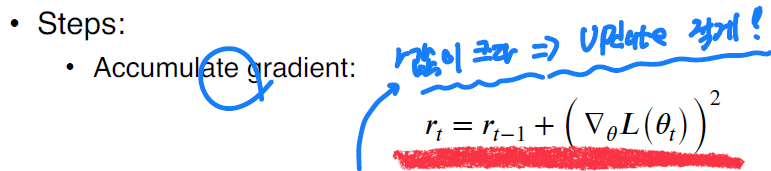
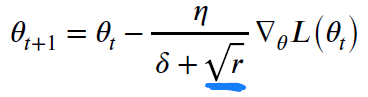

### RMSProp
AdaGrad loss function이 convex할 때 잘 작동합니다<br>
**하지만 AdaGrad의 문제점으로는 어떤 방향에 대해 large gradient가 있다면은, 이제 그 방향으로는 다시는 update가 되지 않는다는 문제가 발생합니다. 즉 나중에 optimize를 위해 다시 그 방향으로 가야 하는데, 기존에 large gradient가 있었으므로 그 방향으로 갈 수 없다는 문제인 것입니다**<br>
RMSProp은 이러한 문제를 해결하고자 **exponential moving average**를 도입합니다<br>
r(𝑡)= 𝛼(𝑟𝑡−1) + (1 − 𝛼)(∇𝜃𝐿(𝜃𝑡))2<br>
RMSProp의 update 공식은 위와 같습니다. 즉 기존의 r(accumulated gradient)에 𝛼를 곱하고 현재의 gradient제곱에 (1 − 𝛼)를 곱하면서, 점점 update가 되면서 **초기에 있던 r값이 가면 갈 수록 줄어들어서, 결국에는 나중에 다시 초기에 있던 방향으로 update가 가능하게 되는 것입니다** 


---

### Adam
Adam 방법은 실제로 가장 많이 사용하는 방법입니다<br>
이 방법은 Nesetrov Momentum과 RMSProp 방식을 모두 사용합니다<br>
**즉 update하는 방향(Nesetrov Momentum)과 update 크기(RMSProp)를 모두 고려하는 방법이라 할 수 있겠습니다**<br>



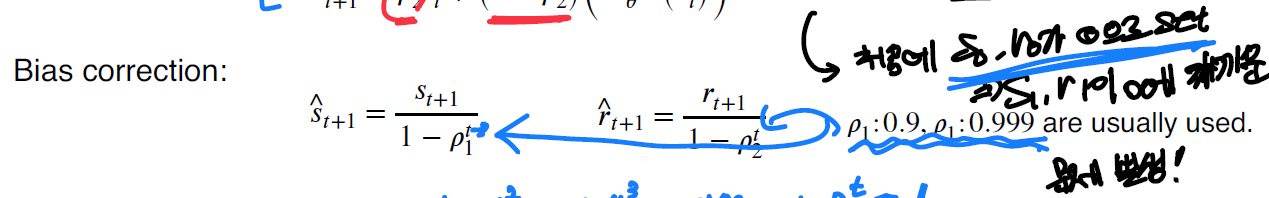

Adam 방법은 **bias correction**을 같이 해주어야 하는데, 그 이유로는 위의 공식에서 보듯이 초기에 s(1)과 r(1)값이 0으로 빠진다는 문제가 발생하기 때문입니다<br>

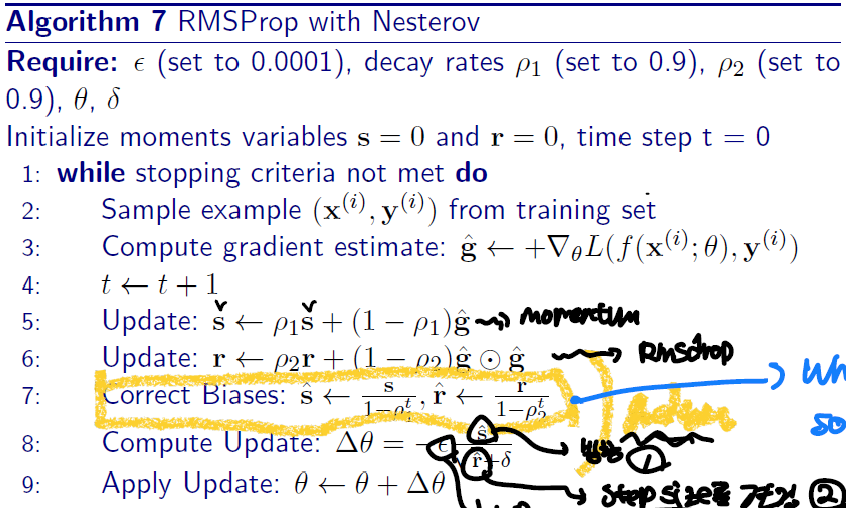



---
## 정규화 기법
신경망을 효율적으로 가르쳐서 loss를 최소화하는 것으로만은 충분하지 않습니다<br>
신경망은 새로운 이미지에 대해서도 잘 수행할 수 있어야 하는데요, 이를 위해서는 overfitting이 일어나면은 안됩니다<br>
overfitting을 피하기 위한 방법으로는 여러가지 방법이 있는데요, 그 중에 하나인 정규화에 대해 설명하겠습니다<br>


---


### 조기 중단
overfitting은 작은 훈련 집합에 대해 여러번 반복하면 발생합니다<br>
이를 방지하려면 적절한 훈련 반복 횟수를 알면 될 것입니다<br>
적절한 횟수를 알기 위해서는, **교차 검증(cross-validation)**이라는 방법을 사용합니다<br>
즉, 각 epoch이후, **검증 데이터(validation data)를 이용하여 모델의 성능을 측정할 수 있습니다.**<br>
이 검증을 통하여, 훈련을 계속해야할지(검증 정확도는 낮지만 증가하는 양상을 보일때), 아니면 훈련을 중단해야할지(검증 정확도가 계속 낮아지는 양상)를 알 수 있습니다. 이 떄, 후자의 경우를 **조기 중단**이라 부릅니다<br>


---

### L1, L2 규제
overfitting을 방지하는 또 다른 방법으로는 loss-function을 수정하는 방법이 있습니다<br>
**가중치에 일정한 규제를 주어서 매개변수의 폭팔적인 증가를 막을 수 있습니다**<br>
규제의 방법으로는 L1 norm과 L2 norm를 사용하는 방법이 있습니다.<br><br>

먼저 L2 norm을 사용하는 Ridge regularization은 신경망의 매개변수의 값의 제곱의 합을 최소화하도록 만듭니다.<br>
 이를 통해서 **매개변수들이 값을 낮게 유지하면서 더 균일하게 분산되는 효과를 볼 수 있습니다**<br><br>
 반면에 L1 norm을 사용하는 Lasso regularization은 **신경망의 덜 중요한 매개변수를 0으로 축소한다는 효과가 있습니다. 이를 통해 신경망이 노이즈 같은 것을 무시하고 학습한다는 장점이 있습니다**<br><br>

 하지만 규제를 과도하게 해버리면 오히려 loss값이 증가합니다.<br>
 따라서 적절한 규제를 하는 것이 중요하다고 할 수 있습니다<br><br>

 Keras에서 규제는 아래와 같이 사용할 수 있습니다

In [ ]:
# Lasso regularization
l1_reg = tf.keras.regularizers.l1(0.01)
# Ridge regularization
l2_reg = tf.keras.regularizers.l2(0.01)

# 실제 모델에 적용
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(277,277,3), kernel_regularizer=l1_reg)) 



---
## Dropout
**Dropout은 훈련이 반복될 때마다 타깃 계층의 일부 뉴런들의 연결을 임의로 끊어버리는 방식입니다**<br>
따라서 이 방식은 hyperparameter로 끊을 비율( 보통 0.1~0.5 )사이의 값을 취합니다.<br>
dropout을 통하여서 신경망을 임의로 훼손시키면서 **견고한 공동의 특징을 학습하게 해주는 모델을** 만들 수 있습니다.<br>
예를 들면, dropout을 통해 핵심 특징을 담당하던 뉴런과의 연결이 끊어진 경우, 신경망은 다른 중요한 특징을 알아내려 할 것입니다<br>
Keras에서 예측은 다음과 같이 사용할 수 있습니다<br>
```python
model = Sequential( ..., Dropout(0.2))
```




---
## Batch Normalization
**배치 정규화는 이전 계층의 배치 결과를 정규화(평균을 뺀 후 표준편차로 나눔)를 하는 연산입니다**<br> 
이를 통해 각 매개변수들의 range를 유사화하면서, 기여도를 어느 정도 동일하게 맞출 수 있습니다.<br>
Keras에서는 아래와 같이 사용할 수 있습니다<br>
```python3
model.add(Batch_Noramlization())
```



# Reference
- 실전! 텐서플로 2를 활용한 딥러닝 컴퓨터비전 chapter03
- 경희대학교 소프트웨어융합학과 로봇센서데이터처리 과목 Lecture slide 16
- http://taewan.kim/post/cnn/
- https://ndb796.tistory.com/477
- https://statinknu.tistory.com/25

수고하셨습니다 ^.^